In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

In [40]:
df = pd.read_csv("Video_Games.csv")

In [41]:
df.head(5)

Name Platform  Year_of_Release         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  User_Count Developer Rating
0                Wii Sports      Wii           2006.0        Sports  Nintendo     41.36     28.96      3.77         8.45         82.53          76.0          51.0          8       322.0  Nintendo      E
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24           NaN           NaN        NaN         NaN       NaN    NaN
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo     15.68     12.76      3.79         3.29         35.52          82.0          73.0        8.3       709.0  Nintendo      E
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo     15.61     10.93      3.28         2.95         32.77          80.0          73.0          8       192.0  Nintendo      E
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37           NaN           NaN        NaN         NaN       NaN    NaN

In [42]:
pd.set_option('display.max_columns', None)  # Show all columns without truncation
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping DataFrame
df.head(5)

Name Platform  Year_of_Release         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  User_Count Developer Rating
0                Wii Sports      Wii           2006.0        Sports  Nintendo     41.36     28.96      3.77         8.45         82.53          76.0          51.0          8       322.0  Nintendo      E
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24           NaN           NaN        NaN         NaN       NaN    NaN
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo     15.68     12.76      3.79         3.29         35.52          82.0          73.0        8.3       709.0  Nintendo      E
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo     15.61     10.93      3.28         2.95         32.77          80.0          73.0          8       192.0  Nintendo      E
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37           NaN           NaN        NaN         NaN       NaN    NaN

In [43]:
df.describe().T

count         mean         std      min      25%      50%      75%       max
Year_of_Release  16450.0  2006.487356    5.878995  1980.00  2003.00  2007.00  2010.00   2020.00
NA_Sales         16719.0     0.263330    0.813514     0.00     0.00     0.08     0.24     41.36
EU_Sales         16719.0     0.145025    0.503283     0.00     0.00     0.02     0.11     28.96
JP_Sales         16719.0     0.077602    0.308818     0.00     0.00     0.00     0.04     10.22
Other_Sales      16719.0     0.047332    0.186710     0.00     0.00     0.01     0.03     10.57
Global_Sales     16719.0     0.533543    1.547935     0.01     0.06     0.17     0.47     82.53
Critic_Score      8137.0    68.967679   13.938165    13.00    60.00    71.00    79.00     98.00
Critic_Count      8137.0    26.360821   18.980495     3.00    12.00    21.00    36.00    113.00
User_Count        7590.0   162.229908  561.282326     4.00    10.00    24.00    81.00  10665.00

In [44]:
df.nunique().to_frame('Number of unique value')

Number of unique value
Name                              11562
Platform                             31
Year_of_Release                      39
Genre                                12
Publisher                           581
NA_Sales                            402
EU_Sales                            307
JP_Sales                            244
Other_Sales                         155
Global_Sales                        629
Critic_Score                         82
Critic_Count                        106
User_Score                           96
User_Count                          888
Developer                          1696
Rating                                8

In [45]:
df.isnull().sum().to_frame('Number of null value')

Number of null value
Name                                2
Platform                            0
Year_of_Release                   269
Genre                               2
Publisher                          54
NA_Sales                            0
EU_Sales                            0
JP_Sales                            0
Other_Sales                         0
Global_Sales                        0
Critic_Score                     8582
Critic_Count                     8582
User_Score                       6704
User_Count                       9129
Developer                        6623
Rating                           6769

### Try drop all user and critic columns

In [46]:
df.drop(columns = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], inplace = True)

In [47]:
df.isnull().sum().to_frame('Number of null value')

Number of null value
Name                                2
Platform                            0
Year_of_Release                   269
Genre                               2
Publisher                          54
NA_Sales                            0
EU_Sales                            0
JP_Sales                            0
Other_Sales                         0
Global_Sales                        0

In [48]:
df.dropna(inplace = True)

In [49]:
df.isnull().sum().to_frame('Number of null value')

Number of null value
Name                                0
Platform                            0
Year_of_Release                     0
Genre                               0
Publisher                           0
NA_Sales                            0
EU_Sales                            0
JP_Sales                            0
Other_Sales                         0
Global_Sales                        0

In [50]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0                Wii Sports      Wii           2006.0        Sports  Nintendo     41.36     28.96      3.77         8.45         82.53
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo     15.68     12.76      3.79         3.29         35.52
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo     15.61     10.93      3.28         2.95         32.77
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37

# Top 10 of Global Sales

In [51]:
df_top10_GlobalSales = df[['Name','Platform', 'Year_of_Release', 'Genre', 'Global_Sales']].sort_values(by = 'Global_Sales', ascending = False).head(10)
df_top10_GlobalSales

Name Platform  Year_of_Release         Genre  Global_Sales
0                 Wii Sports      Wii           2006.0        Sports         82.53
1          Super Mario Bros.      NES           1985.0      Platform         40.24
2             Mario Kart Wii      Wii           2008.0        Racing         35.52
3          Wii Sports Resort      Wii           2009.0        Sports         32.77
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing         31.37
5                     Tetris       GB           1989.0        Puzzle         30.26
6      New Super Mario Bros.       DS           2006.0      Platform         29.80
7                   Wii Play      Wii           2006.0          Misc         28.92
8  New Super Mario Bros. Wii      Wii           2009.0      Platform         28.32
9                  Duck Hunt      NES           1984.0       Shooter         28.31

In [52]:
# Create the bar chart with green color and a different theme
fig = px.bar(data_frame=df_top10_GlobalSales, y='Global_Sales', x='Name',
             title='Top 10 Games Names based on Global Sales',
             color_discrete_sequence=['green'],  # Set bar color to green
             labels={'Global_Sales': 'Global Sales', 'Name': 'Game Name'},
             template='plotly_dark')  # Set a different theme (plotly_dark)

# Adjust the legend position
fig.update_layout(legend=dict(orientation='h', yanchor='top', y=-0.2))

# Show the plot
fig.show()

In [53]:
fig = px.bar(data_frame = df_top10_GlobalSales, y = 'Global_Sales', x = 'Name'
            ,title = 'top 10 Games Names base on Global Sales')

fig.update_xaxes(tickangle=90)
fig.show()

In [54]:
df_top10_GlobalSales['Platform'].value_counts().to_frame("Sum platform in top 10")

Sum platform in top 10
Wii                       5
NES                       2
GB                        2
DS                        1

In [55]:
df_top10_GlobalSales['Year_of_Release'].value_counts().to_frame("Sum year of release in top 10")

Sum year of release in top 10
2006.0                              3
2009.0                              2
1985.0                              1
2008.0                              1
1996.0                              1
1989.0                              1
1984.0                              1

In [56]:
df_top10_GlobalSales['Genre'].value_counts().to_frame("Sum Genre in top 10")

Sum Genre in top 10
Platform                        3
Sports                          2
Racing                          1
Role-Playing                    1
Puzzle                          1
Misc                            1
Shooter                         1

# Handling the Critic and Score of games 

In [57]:
df = pd.read_csv("Video_Games.csv")

In [58]:
df.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
                    , inplace = True)

In [59]:
df.isnull().sum().to_frame('Number of null value')

Number of null value
Name                                2
Platform                            0
Year_of_Release                   269
Genre                               2
Publisher                          54
Global_Sales                        0
Critic_Score                     8582
Critic_Count                     8582
User_Score                       6704
User_Count                       9129
Developer                        6623
Rating                           6769

In [60]:
df.dropna(subset = ['Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating'], inplace = True)

In [61]:
df_CriticScore = df.sort_values(by = 'Critic_Score', ascending = False)
df_CriticScore[['Critic_Score', 'Critic_Count', 'Genre', 'Publisher', 'Global_Sales']]

Critic_Score  Critic_Count      Genre               Publisher  Global_Sales
227            98.0          19.0     Sports              Activision          4.68
5350           98.0          24.0   Fighting      Namco Bandai Games          0.34
57             98.0          64.0     Action    Take-Two Interactive         10.50
51             98.0          86.0     Action    Take-Two Interactive         11.01
249            97.0          34.0     Sports              Activision          4.41
...             ...           ...        ...                     ...           ...
9106           19.0           4.0     Action  Zoo Digital Publishing          0.14
12132          19.0           5.0   Platform                Metro 3D          0.07
15345          19.0           6.0     Sports  Zoo Digital Publishing          0.02
10663          17.0          11.0  Adventure             Codemasters          0.10
13690          13.0           4.0     Racing             Deep Silver          0.04

[6947 rows x 5 columns]

In [62]:
# Create the bubble chart with a different theme
fig = px.scatter(data_frame=df, x='Critic_Score', y='Global_Sales',
                 size='Global_Sales', color='Publisher',
                 title='Critic Score and Global Sales based on Publisher',
                 labels={'Critic_Score': 'Critic Score', 'Global_Sales': 'Global Sales'},
                 template='plotly_dark')  # Set a different theme

# Show the plot
fig.show()

In [63]:
fig = px.scatter(data_frame = df, x = 'Critic_Score', y = 'Global_Sales'
            ,title = 'critic score and global sales base on publisher', color = 'Publisher')
fig.show()

In [103]:
# Create the scatter plot with a specific theme
fig = px.scatter(data_frame=df, x='Critic_Score', y='Global_Sales',size='Global_Sales',
                 title='Critic Score and Global Sales based on Genre',
                 color='Genre',
                 labels={'Critic_Score': 'Critic Score', 'Global_Sales': 'Global Sales'},
                 template='plotly_dark')  # Set a specific theme (plotly_dark)

# Show the plot
fig.show()

In [65]:
fig = px.scatter(data_frame = df, x = 'Critic_Score', y = 'Global_Sales'
            ,title = 'critic score and global sales base on Genre', color = 'Genre')
fig.show()

In [66]:
# Create the histogram with improved visualization and theme
fig = px.histogram(data_frame=df, x='Critic_Score', title='Critic Score Distribution',
                   nbins=30, marginal='rug',
                   template='plotly_dark',
                   labels={'Critic_Score': 'Critic Score', 'count': 'Critic Count'})

# Adjust the layout
fig.update_layout(xaxis_title='Critic Score', yaxis_title='Critic Count',
                  bargap=0.1, showlegend=False)


In [67]:
fig = px.scatter(data_frame = df, x = 'Critic_Count', y = 'Critic_Score'
            ,title = 'critic count and critic score')
fig.show()

# top 10 platform have big average global sales

In [68]:
df_pltform_sales = df[['Platform', 'Global_Sales']]

In [69]:
# Create a 3D pie chart
fig = px.pie(data_frame=df_pltform_sales, names='Platform', values='Global_Sales',
             title='Global Sales from Platform', template='plotly_dark')

fig.update_traces(hole=0.4, pull=0.05, hoverinfo='label+percent+value')

fig.update_layout(scene=dict(aspectmode='data'))

# Show the plot
fig.show()

In [70]:
fig = px.pie(data_frame = df_pltform_sales, names = 'Platform', values = 'Global_Sales'
            ,title = 'global sales from platform')
fig.show()

In [71]:
df_platform_sales_mean = df_pltform_sales.groupby(['Platform']).mean().sort_values(by = 'Global_Sales', ascending = False).head(10)
df_platform_sales_mean 

Global_Sales
Platform              
Wii           1.369857
PS            1.359020
PS4           1.016862
PS3           1.010945
X360          0.984059
PS2           0.828906
DS            0.819145
XOne          0.814906
3DS           0.787898
WiiU          0.742472

In [72]:
# Create a 3D pie chart
fig = px.pie(data_frame=df_platform_sales_mean, names=df_platform_sales_mean.index, values='Global_Sales',
             title='Mean Global Sales from Platform', template='plotly_dark')

fig.update_traces(hole=0.4, pull=0.05, hoverinfo='label+percent+value')

fig.update_layout(scene=dict(aspectmode='data'))
fig.show()

In [73]:
fig = px.pie(data_frame = df_platform_sales_mean, names = df_platform_sales_mean.index, values = 'Global_Sales',
            title = "mean global sales from platform")
fig.show()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 3D pie chart for Global Sales from Platform
fig1 = go.Figure(data=[
    go.Pie(
        labels=df_pltform_sales['Platform'],
        values=df_pltform_sales['Global_Sales'],
        title='Global Sales from Platform',
        hole=0.4,
        pull=0.05,
        hoverinfo='label+percent+value'
    )
])
fig1.update_layout(scene=dict(aspectmode='data'))

# Create a 3D pie chart for Mean Global Sales from Platform
fig2 = go.Figure(data=[
    go.Pie(
        labels=df_platform_sales_mean.index,
        values=df_platform_sales_mean['Global_Sales'],
        title='Mean Global Sales from Platform',
        hole=0.4,
        pull=0.05,
        hoverinfo='label+percent+value'
    )
])
fig2.update_layout(scene=dict(aspectmode='data'))

# Create subplots with two plots side by side
fig = make_subplots(1, 2)

# Assign each plot to a subplot
fig.add_trace(fig1.data[0], 1, 1)
fig.add_trace(fig2.data[0], 1, 2)

# Update the subplot layout
fig.update_layout(title_text='Global Sales from Platform vs. Mean Global Sales from Platform',
                  showlegend=False)

# Show the plot
fig.show()

# Top 10 Rating have big average global sales

In [74]:
df_rating_sales = df[['Rating', 'Global_Sales']]

In [75]:
df_rating_sales_mean = df_rating_sales.groupby('Rating').mean().sort_values(by = 'Global_Sales', ascending = False).head(10)
df_rating_sales_mean 

Global_Sales
Rating              
AO          1.950000
K-A         1.920000
M           0.984928
E           0.934707
E10+        0.585169
T           0.577058
RP          0.035000

In [76]:
# Create a 3D pie chart
fig = px.pie(data_frame=df_rating_sales, names='Rating', values='Global_Sales',
             title='Global Sales from Rating', template='plotly_dark')

fig.update_traces(hole=0.4, pull=0.05, hoverinfo='label+percent+value')

fig.update_layout(scene=dict(aspectmode='data'))

# Show the plot
fig.show()

In [77]:
fig = px.pie(data_frame = df_rating_sales, names = 'Rating', values = 'Global_Sales'
            ,title = 'global sales from Rating')
fig.show()

In [78]:
# Create a pie chart with the same theme
fig = px.pie(data_frame=df_rating_sales_mean, names=df_rating_sales_mean.index, values='Global_Sales',
             title='Mean Global Sales from Rating', template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Pastel)

#fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_traces(hole=0.4, pull=0.05, hoverinfo='label+percent+value')

fig.update_layout(scene=dict(aspectmode='data'))

# Show the plot
fig.show()

In [79]:
fig = px.pie(data_frame = df_rating_sales_mean, names = df_rating_sales_mean.index, values = 'Global_Sales'
            ,title = 'mean global sales from Rating')
fig.show()

# top 10 developer have average good critic score

In [80]:
df_dev_critic = df[['Developer', 'Critic_Score']]

In [81]:
df_dev_critic_mean = df_dev_critic.groupby('Developer').mean().sort_values(by = 'Critic_Score', ascending = False).head(10)
df_dev_critic_mean

Critic_Score
Developer                                         
Irrational Games, 2K Marin               96.000000
Kojima Productions, Moby Dick Studio     94.000000
Digital Extremes, 2K Marin               94.000000
Bungie Software                          93.666667
DMA Design, Rockstar North               93.000000
Rockstar North                           92.857143
ThatGameCompany                          92.000000
Irrational Games                         91.500000
Valve Software                           91.384615
SCE/WWS, Media Molecule                  91.000000

In [82]:
# Create a 3D horizontal bar chart
fig = px.bar(data_frame=df_dev_critic_mean, y=df_dev_critic_mean.index, x='Critic_Score',
             title='Top 10 Developers by Mean Critic Score', orientation='h', template='plotly_dark')

# Customize the layout
fig.update_layout(xaxis_title='Mean Critic Score', yaxis_title='Developer', height=600, width=800,
                  scene=dict(
                      xaxis=dict(showticklabels=False, title=''),
                      yaxis=dict(showticklabels=False, title=''),
                      zaxis=dict(showticklabels=False, title=''),
                      camera=dict(
                          eye=dict(x=2, y=1.5, z=1.3)
                      )
                  )
)

# Show the plot
fig.show()

In [83]:
fig = px.bar(data_frame = df_dev_critic_mean , y = df_dev_critic_mean.index, x = 'Critic_Score'
            ,title = 'top 10 Developer from mean critic Score')
fig.show()

#  Top 10 publisher make global sales

In [84]:
df_dev_publisher = df[['Publisher', 'Global_Sales']]

In [85]:
df_dev_publisher_mean = df_dev_publisher.groupby('Publisher').mean().sort_values(by = 'Global_Sales', ascending = False).head(10)
df_dev_publisher_mean 

Global_Sales
Publisher                                       
Nintendo                                2.911301
GT Interactive                          2.833333
SquareSoft                              2.764444
RedOctane                               2.170000
Valve                                   1.700000
Hello Games                             1.700000
Microsoft Game Studios                  1.535390
Sony Computer Entertainment Europe      1.528182
Bethesda Softworks                      1.487708
Hasbro Interactive                      1.430000

In [86]:
# Create a bar chart with the same theme
fig = px.bar(data_frame=df_dev_publisher_mean, y=df_dev_publisher_mean.index, x='Global_Sales',
             title='Top 10 Publishers by Mean Global Sales', template='plotly_dark')

# Customize the layout
fig.update_layout(yaxis_title='Publisher', xaxis_title='Mean Global Sales')

# Show the plot
fig.show()

In [87]:
fig = px.bar(data_frame = df_dev_publisher_mean , y = df_dev_publisher_mean.index, x = 'Global_Sales'
            ,title = 'top 10 publisher from mean global sales')
fig.show()

# All column correlation

In [88]:
df = pd.read_csv("Video_Games.csv")

In [89]:
df.dropna(inplace = True)

In [90]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  User_Count Developer Rating
0             Wii Sports      Wii           2006.0    Sports  Nintendo     41.36     28.96      3.77         8.45         82.53          76.0          51.0          8       322.0  Nintendo      E
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo     15.68     12.76      3.79         3.29         35.52          82.0          73.0        8.3       709.0  Nintendo      E
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo     15.61     10.93      3.28         2.95         32.77          80.0          73.0          8       192.0  Nintendo      E
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo     11.28      9.14      6.50         2.88         29.80          89.0          65.0        8.5       431.0  Nintendo      E
7               Wii Play      Wii           2006.0      Misc  Nintendo     13.96      9.18      2.93         2.84         28.92          58.0          41.0        6.6       129.0  Nintendo      E

In [91]:
from sklearn import preprocessing

In [92]:
def encodeData(data:'DataFrame', columns:str):
    encoder = preprocessing.LabelEncoder()
    encoder.fit(data[columns])

    return encoder

def encodingTransform(encoder:'Encoder', data:'DataFrame', columns:str):
    trans_col = encoder.transform(data[columns])
    data[columns] = trans_col  
    
    return data

def encodingInversTransfom(encoder:'Encoder', data:'Array'):
    invers_Trans = encoder.inverse_transform(data)
    
    return invers_Trans

In [93]:
encode_platform = encodeData(df, 'Platform')
encodingTransform(encode_platform, df, 'Platform')

encode_genre = encodeData(df, 'Genre')
encodingTransform(encode_genre, df, 'Genre')

encode_publisher = encodeData(df, 'Publisher')
encodingTransform(encode_publisher, df, 'Publisher')

encode_developer = encodeData(df, 'Developer')
encodingTransform(encode_developer, df, 'Developer')

encode_rating = encodeData(df, 'Rating')
encodingTransform(encode_rating, df, 'Rating')

df.head(10)

Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  User_Count  Developer  Rating
0                  Wii Sports        12           2006.0     10        160     41.36     28.96      3.77         8.45         82.53          76.0          51.0          8       322.0        771       1
2              Mario Kart Wii        12           2008.0      6        160     15.68     12.76      3.79         3.29         35.52          82.0          73.0        8.3       709.0        771       1
3           Wii Sports Resort        12           2009.0     10        160     15.61     10.93      3.28         2.95         32.77          80.0          73.0          8       192.0        771       1
6       New Super Mario Bros.         2           2006.0      4        160     11.28      9.14      6.50         2.88         29.80          89.0          65.0        8.5       431.0        771       1
7                    Wii Play        12           2006.0      3        160     13.96      9.18      2.93         2.84         28.92          58.0          41.0        6.6       129.0        771       1
8   New Super Mario Bros. Wii        12           2009.0      4        160     14.44      6.94      4.70         2.24         28.32          87.0          80.0        8.4       594.0        771       1
11              Mario Kart DS         2           2005.0      6        160      9.71      7.47      4.13         1.90         23.21          91.0          64.0        8.6       464.0        771       1
13                    Wii Fit        12           2007.0     10        160      8.92      8.03      3.60         2.15         22.70          80.0          63.0        7.7       146.0        771       1
14         Kinect Adventures!        14           2010.0      3        144     15.00      4.89      0.24         1.69         21.81          61.0          45.0        6.3       106.0        469       1
15               Wii Fit Plus        12           2009.0     10        160      9.01      8.49      2.53         1.77         21.79          80.0          33.0        7.4        52.0        771       1

In [94]:
invrs_platform = encodingInversTransfom(encode_platform, np.array(df['Platform']))

In [95]:
for numerik, nominal in zip(np.unique(df['Platform']), np.unique(invrs_platform)):
    print(f"{numerik} --> {nominal}")

0 --> 3DS
1 --> DC
2 --> DS
3 --> GBA
4 --> GC
5 --> PC
6 --> PS
7 --> PS2
8 --> PS3
9 --> PS4
10 --> PSP
11 --> PSV
12 --> Wii
13 --> WiiU
14 --> X360
15 --> XB
16 --> XOne


In [96]:
df.head()

Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  User_Count  Developer  Rating
0             Wii Sports        12           2006.0     10        160     41.36     28.96      3.77         8.45         82.53          76.0          51.0          8       322.0        771       1
2         Mario Kart Wii        12           2008.0      6        160     15.68     12.76      3.79         3.29         35.52          82.0          73.0        8.3       709.0        771       1
3      Wii Sports Resort        12           2009.0     10        160     15.61     10.93      3.28         2.95         32.77          80.0          73.0          8       192.0        771       1
6  New Super Mario Bros.         2           2006.0      4        160     11.28      9.14      6.50         2.88         29.80          89.0          65.0        8.5       431.0        771       1
7               Wii Play        12           2006.0      3        160     13.96      9.18      2.93         2.84         28.92          58.0          41.0        6.6       129.0        771       1

In [97]:
df.drop(columns = 'Name', inplace = True)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/k2/p_937gq11md2dyq_pjv1qn200000gp/T/ipykernel_27509/1100438177.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



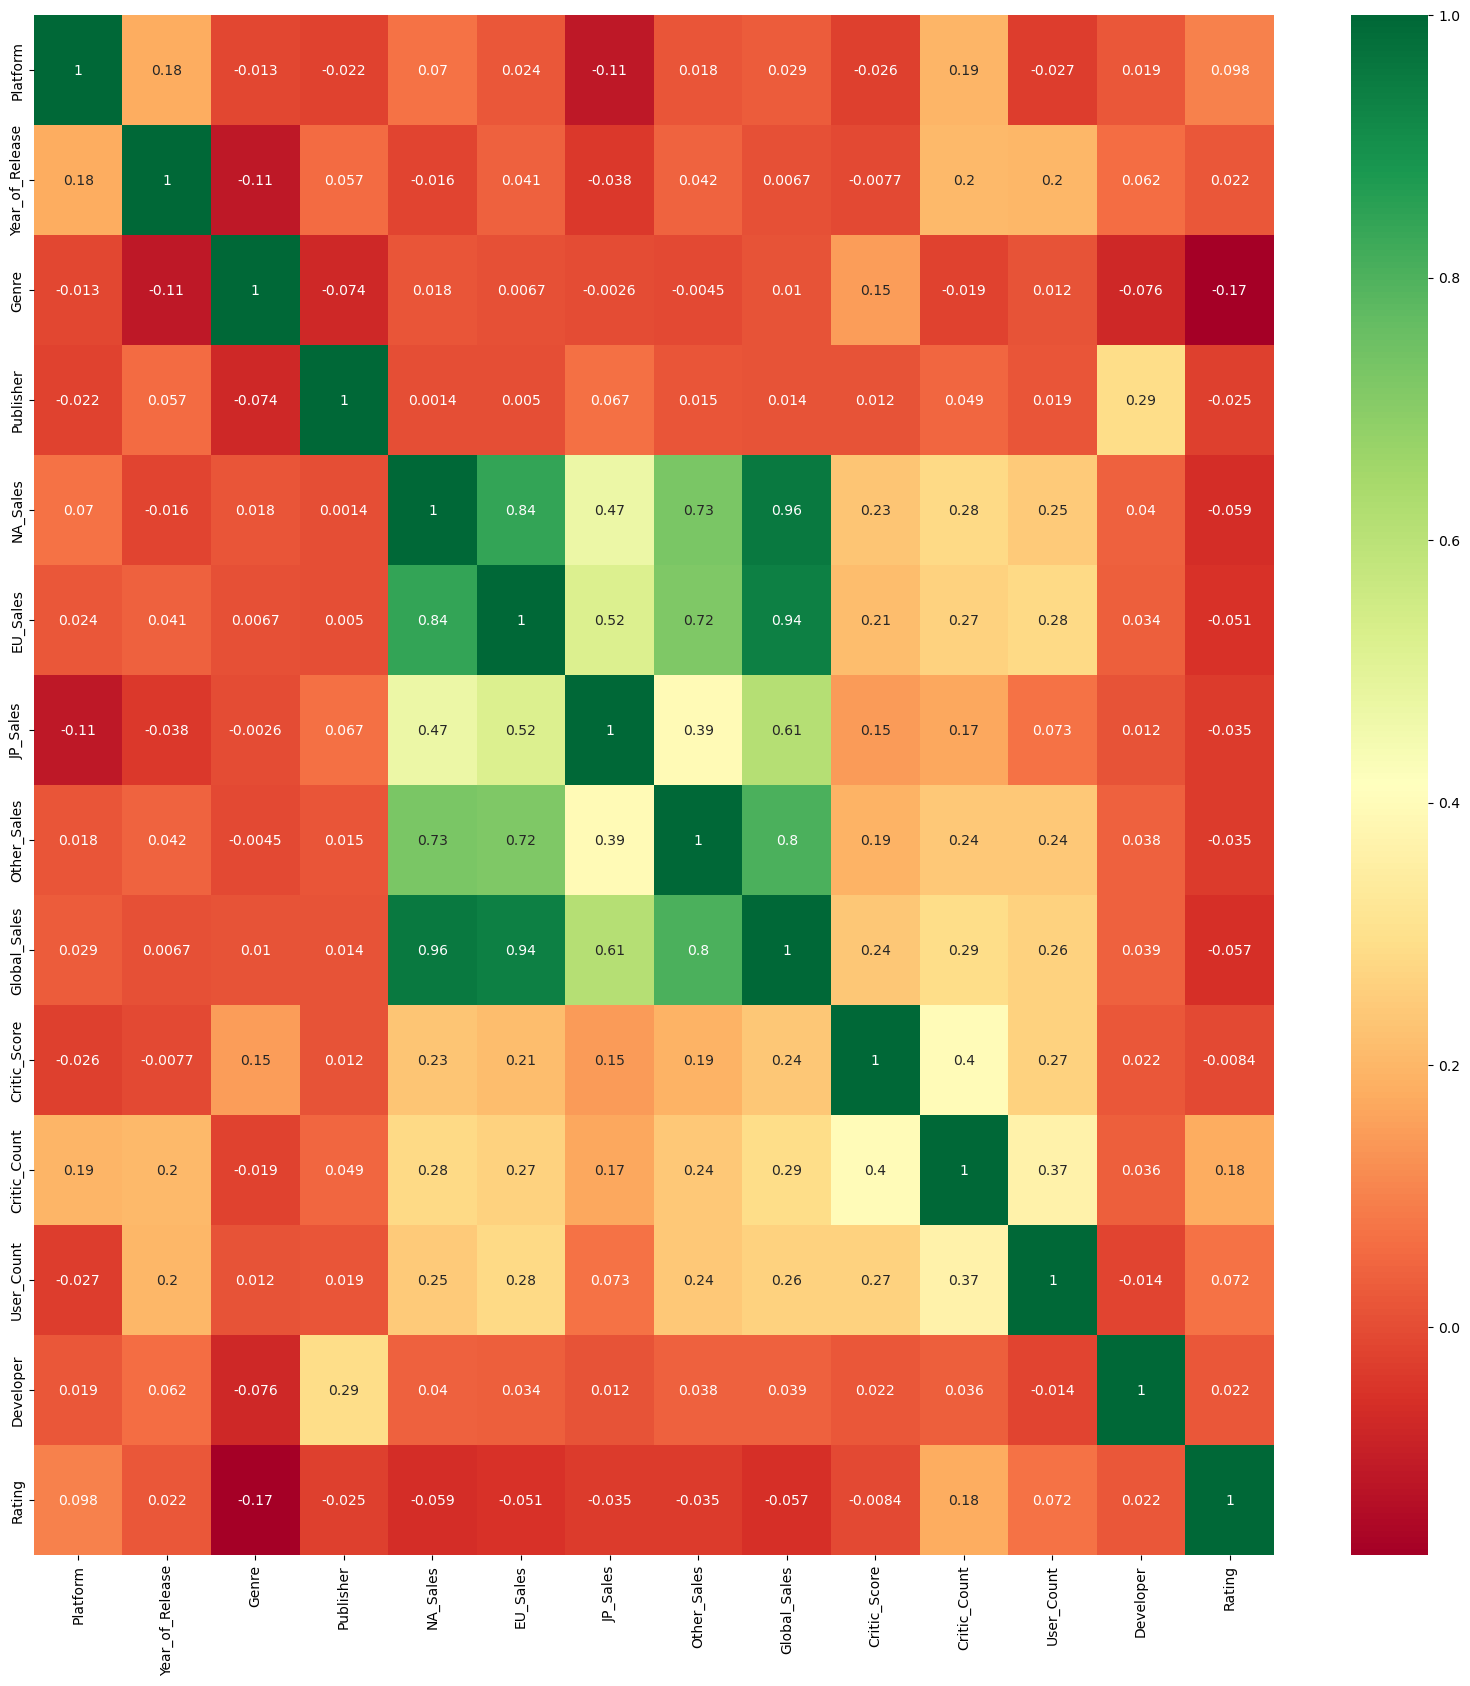

In [99]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
plt.xticks(rotation = 90)

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [100]:
# It's hard to forcest succecs upcoming games bescause there is no label